In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

dataFile = pd.read_csv('dataFiles/Fu_multifit.csv')
X = np.array([dataFile['Velocity'],dataFile['L/S']]).T
Y = np.array(dataFile['contact ratio']) / 100

In [2]:
reg = LinearRegression().fit(X,Y)
print(reg.score(X,Y))
reg.coef_

0.8993282506860827


array([0.02007223, 0.21724281])

In [3]:
X1 = [[2.5,0.08]]
plastic = reg.predict(X1)
print(plastic)

[0.05952281]


In [4]:
ratio = plastic/(1-plastic)
print(ratio)
print(reg.predict(X[0:7,:]))

[0.06329001]
[0.18852183 0.21256833 0.25302754 0.30056782 0.31830947 0.34569337
 0.37878411]


Text(0, 0.5, 'Contact ratio')

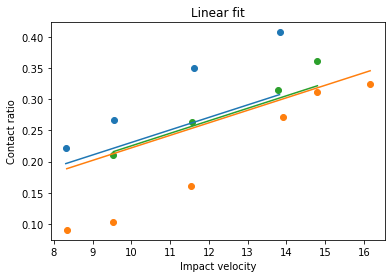

In [5]:
import matplotlib.pyplot as plt 
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],reg.predict(X[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],reg.predict(X[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],reg.predict(X[8:12,:]))
plt.title('Linear fit')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')

In [6]:
#polynomial regression fit
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,interaction_only=False)
X_poly = poly.fit_transform(X)
# predict_poly = poly.fit_transform(Y)
clf = LinearRegression()
clf.fit(X_poly,Y)
mul_coeff = clf.coef_
print(clf.score(X_poly,Y))
print(mul_coeff)

0.9919677571129205
[ 0.00000000e+00  1.70578279e-02 -4.28364632e+00 -3.50458587e-04
  1.64273909e-01  2.00403193e+01]


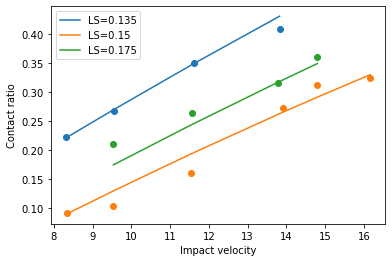

In [7]:
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],clf.predict(X_poly[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],clf.predict(X_poly[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],clf.predict(X_poly[8:12,:]))
# plt.title('Squares + All interactions')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')
plt.legend(['LS=0.135','LS=0.15','LS=0.175'])

0.9890250440724381
[ 0.         -0.0267725  -0.92390284  0.40204208]


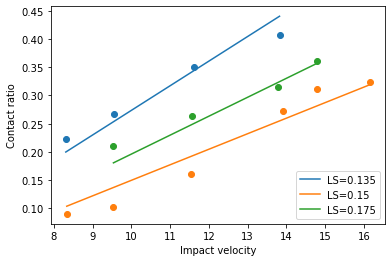

In [20]:
poly1 = PolynomialFeatures(2,interaction_only=True)
X_poly1 = poly1.fit_transform(X)
# predict_poly = poly.fit_transform(Y)
clf1 = LinearRegression()
clf1.fit(X_poly1,Y)
mul_coeff = clf1.coef_
print(clf1.score(X_poly1,Y))
print(mul_coeff)
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],clf1.predict(X_poly1[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],clf1.predict(X_poly1[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],clf1.predict(X_poly1[8:12,:]))
# plt.title('Linear + interactions included in fitting')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')
plt.legend(['LS=0.135','LS=0.15','LS=0.175'],loc='lower right')

In [9]:
datafile = pd.read_csv('dataFiles/test_data1_WithOutputs_withCalculatedValues.csv')
from HelperTools import DataCompletionMethods
# datafile = pd.read_csv('dataFiles/pls_200points_MRT_torqueAdded.csv')
dcm_object = DataCompletionMethods.DataCompletionMethods(datafile)
[Vfree,Vmax] = dcm_object.vFreeCalculation(datafile['Granulator diameter (mm)'],datafile)
datafile['Vol free'] = Vfree
datafile['Vol max'] = Vmax
numer_old = np.array((datafile['DetTorque']*datafile['RPM']*2*np.pi) / (60*(datafile['FlowRate (kg/hr)']/3600)*datafile['DetMRT']*(datafile['Vol free']/datafile['Vol max'])))
# numer = (datafile['DetTorque']*datafile['RPM (1/s)']) / (60*datafile['FlowRate (kg/hr)']*datafile['DetMRT']*(datafile['Vol free']/datafile['Vol max']))
numer = np.array((datafile['DetTorque']*datafile['RPM']*(2*np.pi/60)) / (datafile['Vol max'] * datafile['Bulk Density'] * datafile['Calc Fill level'] / (1e9)))
datafile['velocity'] = np.sqrt(4*np.pi*np.array(numer))   
velocity = datafile['velocity']
lsratio = datafile['L/S Ratio']
inid50 = datafile['Initial d50']
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
inputframes = [velocity,lsratio]
inputframes = pd.concat(inputframes,axis=1)
# X_poly_new = poly1.fit_transform(inputframes)
# pre = np.abs(clf1.predict(X_poly_new))
# ratio = pre/(1-pre)
# new contact ratio obtained from lalith
pre = np.array(0.7315 * inid50/1e6 + 0.3486 * vis * lsratio * 0.001 + 0.1352 * velocity * lsratio) 
# print(ratio)
# poly1.get_feature_names(inputframes.columns)
from scipy import stats
print(stats.describe(numer))
print(stats.describe(numer_old))

DescribeResult(nobs=132, minmax=(-17538.720085983052, 241321.4806003002), mean=7344.702473653226, variance=643697192.1421124, skewness=7.1091143818882685, kurtosis=57.29139779404603)
DescribeResult(nobs=132, minmax=(-24996.022803570046, 234136.39988795045), mean=7955.793708291325, variance=629743314.2971166, skewness=6.65372048890932, kurtosis=52.02167125843286)
<ipython-input-9-85eaf43402f5>:11: RuntimeWarning: invalid value encountered in sqrt
  datafile['velocity'] = np.sqrt(4*np.pi*np.array(numer))


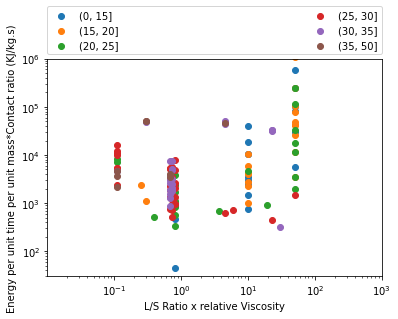

In [10]:
fig,ax = plt.subplots()
datafile['contact ratio'] = pre
datafile['numer'] = numer*pre
ranges = [0,15,20,25,30,35,50]
datafile['Extent of gran'] = np.divide(datafile['final d50'],datafile['Initial d50'])
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass*Contact ratio (KJ/kg.s)')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-2,500])
plt.ylim([30,1e5])
plt.xticks([1e-1,1e0,1e1,1e2,1e3])
plt.yticks([1e6,1e5,1e4,1e3,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

In [11]:
# X_poly_new = poly.fit_transform(inputframes)
# pre = np.abs(clf.predict(X_poly_new))
# ratio = pre/(1-pre)
# print(ratio)
# poly.get_feature_names(inputframes.columns)

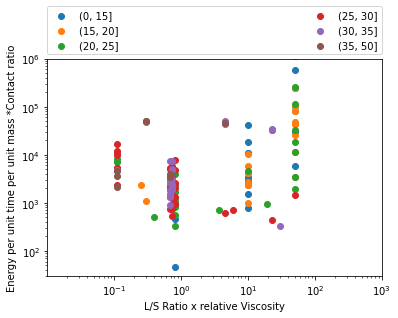

In [12]:
fig,ax = plt.subplots()
# datafile['numer'] = numer*pre
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)']/0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass *Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-2,500])
plt.ylim([30,1e5])
plt.xticks([1e-1,1e0,1e1,1e2,1e3])
plt.yticks([1e6,1e5,1e4,1e3,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

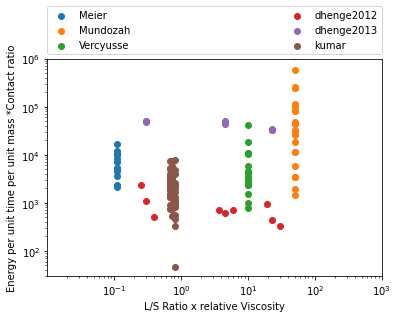

In [13]:
fig,ax = plt.subplots()
numer = np.array(numer)
lsratio = np.array(lsratio)
exp = np.array(datafile['Experiments'])
for g in np.unique(exp):
    i = np.where(exp==g)
    ax.scatter(lsratio[i]*vis[i],numer[i]*pre[i],label=g)
plt.xlabel('L/S Ratio x relative Viscosity')
# plt.ylabel('Contact energy')
plt.ylabel('Energy per unit time per unit mass *Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-2,500])
plt.ylim([30,1e5])
plt.xticks([1e-1,1e0,1e1,1e2,1e3])
plt.yticks([1e6,1e5,1e4,1e3,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

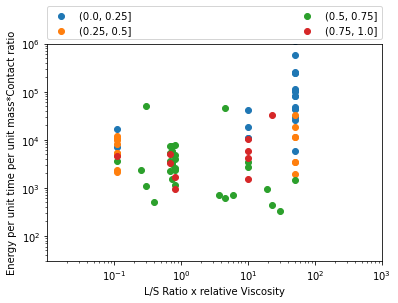

In [14]:
fig,ax = plt.subplots()
# datafile['numer'] = numer*pre 
ranges = [0,0.25,0.5,0.75,1]
datafile['Calc Fill level'] = dcm_object.fillLevel_osorio(datafile['DetMRT'])
groups = datafile.groupby(pd.cut(datafile['Calc Fill level'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass*Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-2,500])
plt.ylim([30,1e5])
plt.xticks([1e-1,1e0,1e1,1e2,1e3])
plt.yticks([1e6,1e5,1e4,1e3,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

In [16]:
# datafile.to_csv('dataFiles/Alloutputs_regimemap.csv')
print(datafile['contact ratio'])

0      1.182021
1      1.511189
2      1.790653
3      1.064320
4      1.121456
         ...   
127    1.497619
128    1.202380
129    1.987621
130    2.372100
131    2.102248
Name: contact ratio, Length: 132, dtype: float64


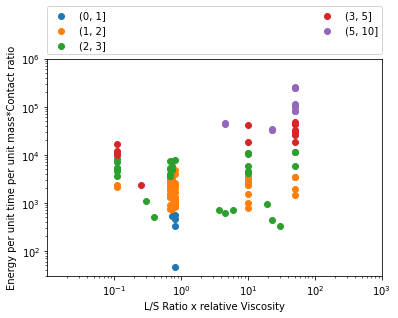

In [17]:
fig,ax = plt.subplots()
# datafile['numer'] = numer*pre 
ranges = [0,1,2,3,5,10]
# datafile['Calc Fill level'] = dcm_object.fillLevel_osorio(datafile['DetMRT'])
groups = datafile.groupby(pd.cut(datafile['contact ratio'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass*Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-2,500])
plt.ylim([30,1e5])
plt.xticks([1e-1,1e0,1e1,1e2,1e3])
plt.yticks([1e6,1e5,1e4,1e3,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)